In [9]:
from sklearn_pandas import DataFrameMapper
from plotnine import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

training_data = 'adult-training.csv'
test_data = 'adult-test.csv'

columns = ['Age','Workclass','fnlgwt','Education','EdNum','MaritalStatus',
           'Occupation','Relationship','Race','Sex','CapitalGain','CapitalLoss',
           'HoursPerWeek','Country','Income']

df_train_set = pd.read_csv(training_data, names=columns)
df_test_set = pd.read_csv(test_data, names=columns, skiprows=1)
df_train_set.drop('fnlgwt', axis=1, inplace=True)
df_test_set.drop('fnlgwt', axis=1, inplace=True)

In [3]:
df_train_set.head()

,Age,Workclass,Education,EdNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#replace the special character to "Unknown"
for i in df_train_set.columns:
    df_train_set[i].replace(' ?', 'Unknown', inplace=True)
    df_test_set[i].replace(' ?', 'Unknown', inplace=True)
# remove spaces
for col in df_train_set.columns:
    if df_train_set[col].dtype != 'int64':
        df_train_set[col] = df_train_set[col].apply(lambda val: val.replace(" ", ""))
        df_train_set[col] = df_train_set[col].apply(lambda val: val.replace(".", ""))
        df_test_set[col] = df_test_set[col].apply(lambda val: val.replace(" ", ""))
        df_test_set[col] = df_test_set[col].apply(lambda val: val.replace(".", ""))

In [5]:
df_train_set.drop(["Country", "Education"], axis=1, inplace=True)
df_test_set.drop(["Country", "Education"], axis=1, inplace=True)

colnames = list(df_train_set.columns)
colnames.remove('Age')
colnames.remove('EdNum')
colnames = ['AgeGroup', 'Education'] + colnames

labels = ["{0}-{1}".format(i, i + 9) for i in range(0, 100, 10)]
df_train_set['AgeGroup'] = pd.cut(df_train_set.Age, range(0, 101, 10), right=False, labels=labels)
df_test_set['AgeGroup'] = pd.cut(df_test_set.Age, range(0, 101, 10), right=False, labels=labels)

labels = ["{0}-{1}".format(i, i + 4) for i in range(0, 20, 5)]
df_train_set['Education'] = pd.cut(df_train_set.EdNum, range(0, 21, 5), right=False, labels=labels)
df_test_set['Education'] = pd.cut(df_test_set.EdNum, range(0, 21, 5), right=False, labels=labels)

df_train_set = df_train_set[colnames]
df_test_set = df_test_set[colnames]

In [6]:
df_train_set.Income.value_counts()

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [7]:
df_test_set.Income.value_counts()

<=50K    12435
>50K      3846
Name: Income, dtype: int64

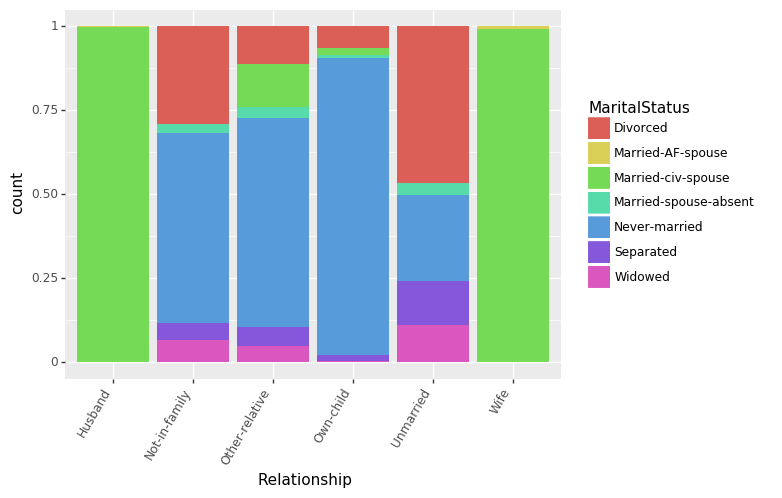

<ggplot: (132320665159)>

In [10]:
(ggplot(df_train_set, aes(x = "Relationship", fill = "MaritalStatus"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = 60, hjust = 1))
)

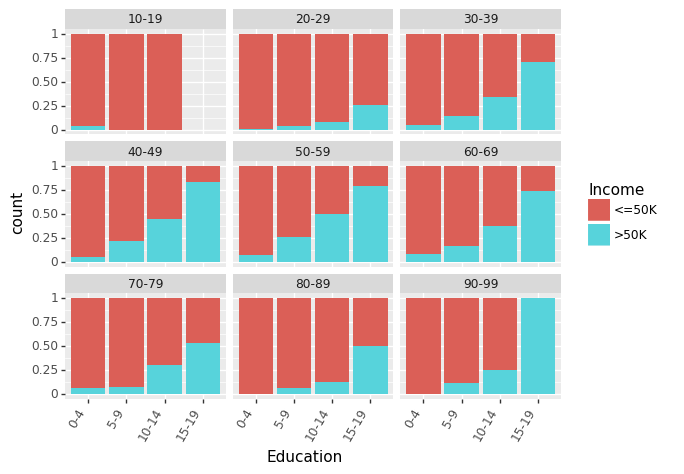

<ggplot: (132318847594)>

In [11]:
(ggplot(df_train_set, aes(x = "Education", fill = "Income"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = 60, hjust = 1))
 + facet_wrap('~AgeGroup')
)

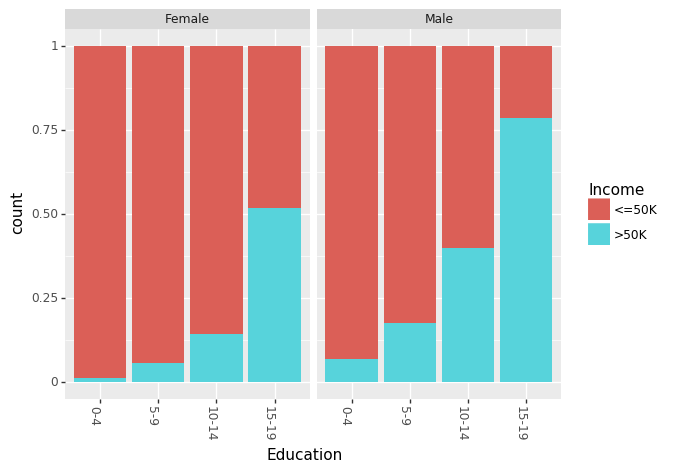

<ggplot: (132322317951)>

In [12]:
(ggplot(df_train_set, aes(x = "Education", fill = "Income"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
 + facet_wrap('~Sex')
)

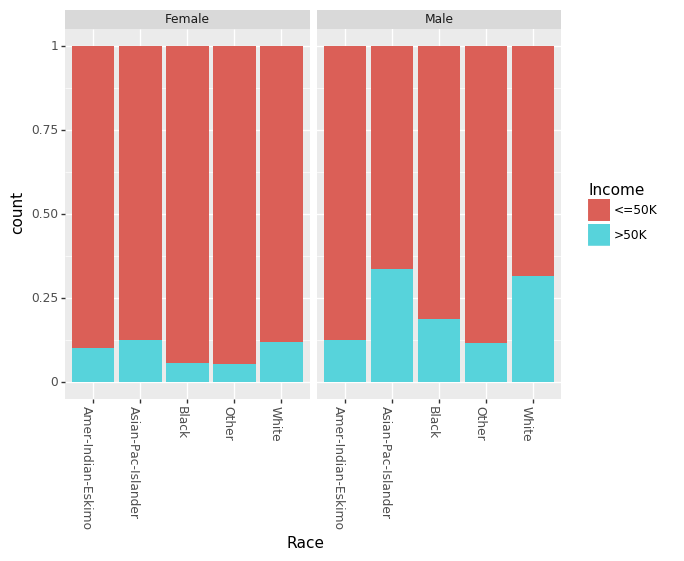

<ggplot: (-9223371904532220037)>

In [13]:
(ggplot(df_train_set, aes(x = "Race", fill = "Income"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
 + facet_wrap('~Sex')
)

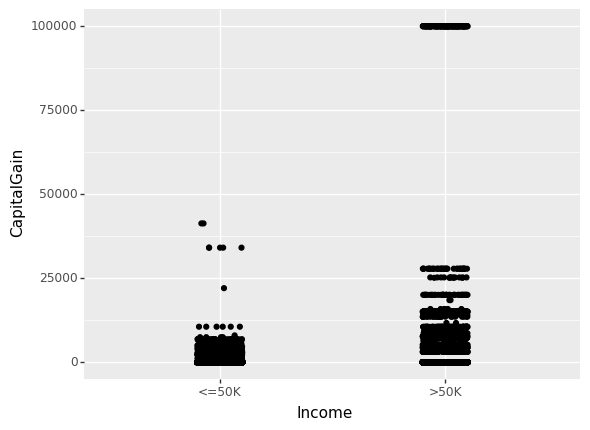

<ggplot: (132318830817)>

In [14]:
(ggplot(df_train_set, aes(x="Income", y="CapitalGain"))
 + geom_jitter(position=position_jitter(0.1))
)

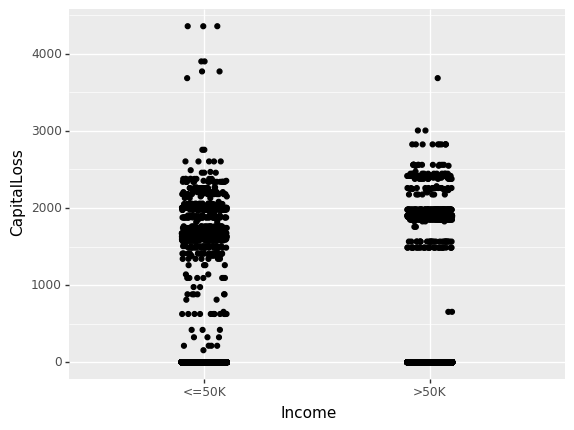

<ggplot: (-9223371904532089621)>

In [15]:
(ggplot(df_train_set, aes(x="Income", y="CapitalLoss"))
 + geom_jitter(position=position_jitter(0.1))
)

In [16]:
mapper = DataFrameMapper([
    ('AgeGroup', LabelEncoder()),
    ('Education', LabelEncoder()),
    ('Workclass', LabelEncoder()),
    ('MaritalStatus', LabelEncoder()),
    ('Occupation', LabelEncoder()),
    ('Relationship', LabelEncoder()),
    ('Race', LabelEncoder()),
    ('Sex', LabelEncoder()),
    ('Income', LabelEncoder())
], df_out=True, default=None)

cols = list(df_train_set.columns)
cols.remove("Income")
cols = cols[:-3] + ["Income"] + cols[-3:]

df_train = mapper.fit_transform(df_train_set.copy())
df_train.columns = cols

df_test = mapper.transform(df_test_set.copy())
df_test.columns = cols

cols.remove("Income")
x_train, y_train = df_train[cols].values, df_train["Income"].values
x_test, y_test = df_test[cols].values, df_test["Income"].values

In [17]:
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(x_train, y_train)
treeClassifier.score(x_test, y_test)

0.8356980529451508

In [19]:
from sklearn.linear_model import LogisticRegression
d=LogisticRegression()
d.fit(x_train, y_train)
d.score(x_test, y_test)

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8027148209569437

In [21]:
from sklearn.neighbors import KNeighborsClassifier
s=KNeighborsClassifier()
s.fit(x_train,y_train)
s.score(x_test,y_test)

0.8470609913395983

In [22]:
from sklearn.ensemble import RandomForestClassifier
l=RandomForestClassifier()
l.fit(x_train,y_train)
l.score(x_test,y_test)

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8476752042257847

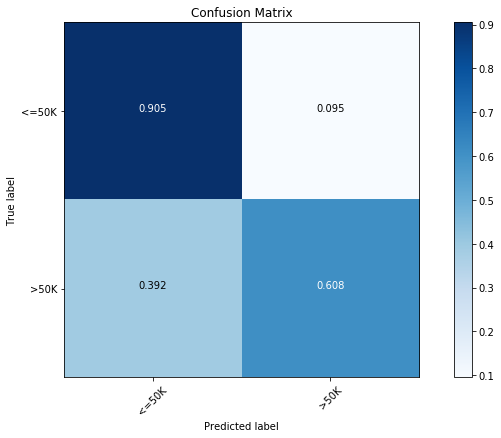

In [22]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
y_pred = treeClassifier.predict(x_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["<=50K", ">50K"], normalize=True)

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'max_features':(None, 9, 6),
     'max_depth':(None, 24, 16),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (16, 4, 12)
}

clf = GridSearchCV(treeClassifier, parameters, cv=5, n_jobs=4)
clf.fit(x_train, y_train)
clf.best_score_, clf.score(x_test, y_test), clf.best_params_

(0.8598323147323486,
 0.8595909342177999,
 {'max_depth': 16,
  'max_features': 9,
  'min_samples_leaf': 12,
  'min_samples_split': 2})

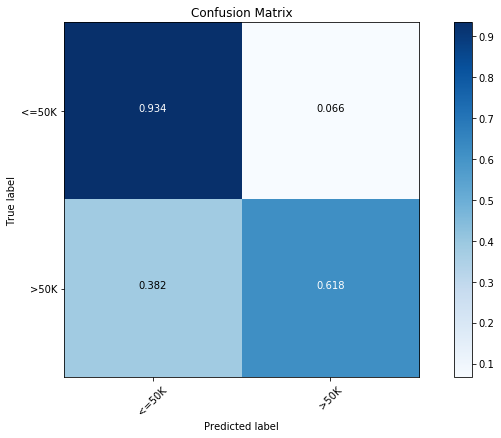

In [24]:
y_pred = clf.predict(x_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["<=50K", ">50K"], normalize=True)